In [472]:
import numpy as np 
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats
import json
from sodapy import Socrata
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from scipy.stats import chi2
plt.style.use('seaborn')

%matplotlib inline
pd.set_option('display.max_columns', 100)

In [152]:
# dataset was taken from kaggle https://www.kaggle.com/peterzhou/airbnb-open-data-in-nyc?select=listings_detail.csv
df = pd.read_csv('listings_detail.csv')

/Users/Dan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (88) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [153]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,18461891,https://www.airbnb.com/rooms/18461891,2.017100e+13,10/3/17,"Bright, comfortable 1B studio near everything!",*Looking to fill these specific dates: June 24...,Very well illuminated space includes comfortab...,*Looking to fill these specific dates: June 24...,none,There are Michelin-rated restaurants in the ar...,NaN,"Astoria is a safe and quaint neighborhood, and...",IMPORTANT: This space is not suitable for chil...,Arrangements will be made in advance regarding...,NaN,https://a0.muscache.com/im/pictures/8ac331a9-3...,https://a0.muscache.com/im/pictures/8ac331a9-3...,https://a0.muscache.com/im/pictures/8ac331a9-3...,https://a0.muscache.com/im/pictures/8ac331a9-3...,916092,https://www.airbnb.com/users/show/916092,Connie Mae,8/3/11,"New York, New York, United States",sensation(URL HIDDEN),NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/2bdfa9ca-a...,https://a0.muscache.com/im/pictures/2bdfa9ca-a...,Astoria,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Queens, NY, United States",Astoria,Ditmars Steinway,Queens,Queens,NY,11105.0,New York,"Queens, NY",US,United States,40.774142,-73.916246,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",NaN,$110.00,NaN,NaN,$250.00,$85.00,1,$0.00,6,6,5 months ago,t,0,0,0,0,10/3/17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict,f,f,1,NaN
1,20702398,https://www.airbnb.com/rooms/20702398,2.017100e+13,10/3/17,Quiet house on City Island,1 private bedroom and bathroom available for o...,NaN,1 private bedroom and bathroom available for o...,none,This neighborhood is dope! Lot's of seafood re...,No loud parties or hard drugs There is wifi bu...,walk! The island is only 1.5 miles long. Publi...,"kitchen, laundry, living room, back yard",My schedule varies week-to-week. I usually wor...,No third-party bookings,https://a0.muscache.com/im/pictures/7c0a47b7-5...,https://a0.muscache.com/im/pictures/7c0a47b7-5...,https://a0.muscache.com/im/pictures/7c0a47b7-5...,https://a0.muscache.com/im/pictures/7c0a47b7-5...,1457680,https://www.airbnb.com/users/show/1457680,James,11/30/11,"Bronx, New York, United States",Hi! Welcome to my airbnb listing. Things you s...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/user/389c4...,https://a0.muscache.com/im/pictures/user/389c4...,NaN,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Bronx, NY, United States",City Island,City Island,Bronx,Bronx,NY,NaN,New York,"Bronx, NY",US,United States,40.849191,-73.786509,f,House,Private room,2,1.0,1.0,1.0,Real Bed,"{"

In [154]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [155]:
# removed many unneccessary columns. Some may be worth looking into for the future, but from time constrain purposes focused on a select group
df.drop(columns=['listing_url', 'scrape_id', 'name', 'summary', 'security_deposit', 'maximum_nights', 'description',
       'space', 'experiences_offered', 'neighborhood_overview','notes', 'transit', 'market', 'review_scores_accuracy',
       'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'host_name', 'review_scores_cleanliness',
       'xl_picture_url', 'host_id', 'host_url', 'host_location', 'host_about', 'host_response_time', 'host_acceptance_rate',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_total_listings_count', 'review_scores_checkin',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'review_scores_communication',
       'city', 'state', 'smart_location', 'country_code', 'country', 'is_location_exact', 'bed_type', 'amenities', 
       'square_feet', 'weekly_price', 'monthly_price', 'guests_included', 'extra_people', 'calendar_updated', 'review_scores_location',
       'has_availability', 'calendar_last_scraped', 'review_scores_value', 'availability_60', 'availability_90', 'availability_365',
       'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'reviews_per_month', 'host_response_rate',
       'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count','neighbourhood_cleansed',
       'neighbourhood_group_cleansed'], inplace=True)


In [156]:
df.columns

Index(['id', 'last_scraped', 'host_since', 'host_is_superhost',
       'host_listings_count', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'cleaning_fee', 'minimum_nights', 'availability_30',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable',
       'is_business_travel_ready', 'cancellation_policy'],
      dtype='object')

In [158]:
# Any NaN values in these columns were dropped as I can not substitute it with any other values like mean or median
df.dropna(subset=(['zipcode','host_since','host_is_superhost','host_listings_count']), inplace=True)

In [159]:
df.isnull().sum().sort_values(ascending = False)

cleaning_fee                12000
review_scores_rating         9851
bathrooms                     138
beds                           78
bedrooms                       69
property_type                   0
last_scraped                    0
host_since                      0
host_is_superhost               0
host_listings_count             0
zipcode                         0
latitude                        0
longitude                       0
cancellation_policy             0
room_type                       0
accommodates                    0
is_business_travel_ready        0
price                           0
minimum_nights                  0
availability_30                 0
number_of_reviews               0
instant_bookable                0
id                              0
dtype: int64

# Cleaning Data and Feature Engineering

In [160]:
# Instead of dropping emtpy cleaning fees I filled them in as $0.00
df['cleaning_fee'] = df['cleaning_fee'].fillna('$0.00')
df['cleaning_fee'] = df['cleaning_fee'].map(lambda x: x.strip('$').replace(',','').split('.')[0])
df['cleaning_fee'] = df['cleaning_fee'].astype(int)

In [161]:
# Reformatted Price in order to be able to add it together with cleaning fee
df['price'] = df['price'].map(lambda x: x.strip('$').replace(',','').split('.')[0])
df['price'] = df['price'].astype(int)
df['zipcode'] = df['zipcode'].astype(int)

In [162]:
# Total price is the target variable I will be testing. Summed listed price with cleaning fee
df['total_price'] = df['price'] + df['cleaning_fee']

In [163]:
# For NaN values in these columns I took the median value and filled in the empty rows
df['bathrooms'] = df['bathrooms'].fillna(1.0)
df['beds'] = df['beds'].fillna(1.0)
df['bedrooms'] = df['bedrooms'].fillna(1.0)

In [164]:
# Similar story filling in NaN value with median value to better retain more rows
df['review_scores_rating'] = df['review_scores_rating'].fillna(93)

In [165]:
# To create boolean values, I changed the t & f values to 1 and 0 in order to be better measure the data
df['host_is_superhost'] = np.where(df['host_is_superhost']=='t',1,0)
df['instant_bookable'] = np.where(df['instant_bookable']=='t',1,0)
df['is_business_travel_ready'] = np.where(df['is_business_travel_ready']=='t',1,0)

In [166]:
# I feature engineered a new column that gives the total amount of years of experience on Airbnb the host has. Wanted to measure if host who are veterens in a relatively new field charge more for their listings
df['last_scraped'] = df['last_scraped'].map(lambda x: x[-2:])
df['last_scraped'] = df['last_scraped'].astype(int)

df['host_since'] = df['host_since'].map(lambda x: x[-2:])
df['host_since'] = df['host_since'].astype(int)

df['host_years'] = df['last_scraped'] - df['host_since']

In [168]:
# The airbnb data itself came with many errors in classifying neighborhoods.
# I created a dictionary through refrencing https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.html

neighborhood_dict = {10453:'Central Bronx',10457:'Central Bronx',10460:'Central Bronx',10458:'Bronx Park and Fordham',
                    10467:'Bronx Park and Fordham',10468:'Bronx Park and Fordham',10451:'High Bridge and Morrisania',
                    10452:'High Bridge and Morrisania',10456:'High Bridge and Morrisania',10454:'Hunts Point and Mott Haven',
                    10455:'Hunts Point and Mott Haven',10459:'Hunts Point and Mott Haven',10474:'Hunts Point and Mott Haven',
                    10463:'Kingsbridge and Riverdale',10471:'Kingsbridge and Riverdale',10466:'Northeast Bronx',10469:'Northeast Bronx',
                    10470:'Northeast Bronx',10475:'Northeast Bronx',10461:'Southeast Bronx',10462:'Southeast Bronx',
                    10464:'Southeast Bronx',10465:'Southeast Bronx',10472:'Southeast Bronx',10473:'Southeast Bronx',
                    11212:'Central Brooklyn',11213:'Central Brooklyn',11216:'Central Brooklyn',11233:'Central Brooklyn',
                    11238:'Central Brooklyn',11209:'Southwest Brooklyn',11214:'Southwest Brooklyn',11228:'Southwest Brooklyn',
                    11204:'Borough Park',11218:'Borough Park',11219:'Borough Park',11230:'Borough Park',11234:'Canarsie and Flatlands',
                    11236:'Canarsie and Flatlands',11239:'Canarsie and Flatlands',11223:'Southern Brooklyn',11224:'Southern Brooklyn',
                    11229:'Southern Brooklyn',11235:'Southern Brooklyn',11201:'Northwest Brooklyn',11205:'Northwest Brooklyn',
                    11215:'Northwest Brooklyn',11217:'Northwest Brooklyn',11231:'Northwest Brooklyn',11203:'Flatbush',
                    11210:'Flatbush',11225:'Flatbush',11226:'Flatbush',11207:'East New York and New Lots',11208:'East New York and New Lots',
                    11211:'Greenpoint',11222:'Greenpoint',11220:'Sunset Park',11232:'Sunset Park',11206:'Bushwick and Williamsburg',
                    11221:'Bushwick and Williamsburg',11237:'Bushwick and Williamsburg',10026:'Central Harlem',10027:'Central Harlem',
                    10030:'Central Harlem',10037:'Central Harlem',10039:'Central Harlem',10001:'Chelsea and Clinton',
                    10011:'Chelsea and Clinton',10018:'Chelsea and Clinton',10019:'Chelsea and Clinton',10020:'Chelsea and Clinton',
                    10036:'Chelsea and Clinton',10029:'East Harlem',10035:'East Harlem',10010:'Gramercy Park and Murray Hill',
                    10016:'Gramercy Park and Murray Hill',10017:'Gramercy Park and Murray Hill',10022:'Gramercy Park and Murray Hill',
                    10012:'Greenwich Village and Soho',10013:'Greenwich Village and Soho',10014:'Greenwich Village and Soho',
                    10004:'Lower Manhattan',10005:'Lower Manhattan',10006:'Lower Manhattan',10007:'Lower Manhattan',
                    10038:'Lower Manhattan',10280:'Lower Manhattan',10002:'Lower East Side',10003:'Lower East Side',
                    10009:'Lower East Side',10021:'Upper East Side',10028:'Upper East Side',10044:'Upper East Side',
                    10065:'Upper East Side',10075:'Upper East Side',10128:'Upper East Side',10023:'Upper West Side',
                    10024:'Upper West Side',10025:'Upper West Side',10031:'Inwood and Washington Heights',10032:'Inwood and Washington Heights',
                    10033:'Inwood and Washington Heights',10034:'Inwood and Washington Heights',10040:'Inwood and Washington Heights',
                    11361:'Northeast Queens',11362:'Northeast Queens',11363:'Northeast Queens',11364:'Northeast Queens',
                    11354:'North Queens',11355:'North Queens',11356:'North Queens',11357:'North Queens',11358:'North Queens',
                    11359:'North Queens',11360:'North Queens',11365:'Central Queens',11366:'Central Queens',11367:'Central Queens',
                    11412:'Jamaica',11423:'Jamaica',11432:'Jamaica',11433:'Jamaica',11434:'Jamaica',11435:'Jamaica',11436:'Jamaica',
                    11101:'Northwest Queens',11102:'Northwest Queens',11103:'Northwest Queens',11104:'Northwest Queens',
                    11105:'Northwest Queens',11106:'Northwest Queens',11374:'West Central Queens',11375:'West Central Queens',
                    11379:'West Central Queens',11385:'West Central Queens',11691:'Rockaways',11692:'Rockaways',11693:'Rockaways',
                    11694:'Rockaways',11695:'Rockaways',11697:'Rockaways',11004:'Southeast Queens',11005:'Southeast Queens',
                    11411:'Southeast Queens',11413:'Southeast Queens',11422:'Southeast Queens',11426:'Southeast Queens',
                    11427:'Southeast Queens',11428:'Southeast Queens',11429:'Southeast Queens',11414:'Southwest Queens',
                    11415:'Southwest Queens',11416:'Southwest Queens',11417:'Southwest Queens',11418:'Southwest Queens',
                    11419:'Southwest Queens',11420:'Southwest Queens',11421:'Southwest Queens',11368:'West Queens',
                    11369:'West Queens',11370:'West Queens',11372:'West Queens',11373:'West Queens',11377:'West Queens',
                    11378:'West Queens',10302:'Port Richmond',10303:'Port Richmond',10310:'Port Richmond',10306:'South Shore',
                    10307:'South Shore',10308:'South Shore',10308:'South Shore',10309:'South Shore',10312:'South Shore',
                    10301:'Stapleton and St. George',10304:'Stapleton and St. George',10305:'Stapleton and St. George',10314:'Mid-Island',
                    10000:np.nan,10048:np.nan,10069:np.nan,10080:np.nan,10106:np.nan,10118:np.nan,10119:np.nan,10129:np.nan,10162:np.nan,
                    10270:np.nan,10279:np.nan,10281:np.nan,10282:np.nan,10550:np.nan,10704:np.nan,11001:np.nan,11109:np.nan,11249:np.nan,
                    11509:np.nan,11580:np.nan,91766:np.nan,99135:np.nan,}

df['neighborhood'] = df['zipcode'].replace(neighborhood_dict)

In [169]:
df.dropna(subset=['neighborhood'], inplace=True)

In [170]:
# Similar reason where I used the updated neighborhood columns to then better organize by borough
borough_dict  = {'Central Bronx':'Bronx','Bronx Park and Fordham':'Bronx','High Bridge and Morrisania':'Bronx',
                 'Hunts Point and Mott Haven':'Bronx','Kingsbridge and Riverdale':'Bronx','Northeast Bronx':'Bronx',
                 'Southeast Bronx':'Bronx','Central Brooklyn':'Brooklyn','Southwest Brooklyn':'Brooklyn',
                 'Borough Park':'Brooklyn','Canarsie and Flatlands':'Brooklyn','Southern Brooklyn':'Brooklyn',
                 'Northwest Brooklyn':'Brooklyn','Flatbush':'Brooklyn','East New York and New Lots':'Brooklyn',
                 'Greenpoint':'Brooklyn','Sunset Park':'Brooklyn','Bushwick and Williamsburg':'Brooklyn',
                 'Central Harlem':'Manhattan','Chelsea and Clinton':'Manhattan','East Harlem':'Manhattan',
                 'Gramercy Park and Murray Hill':'Manhattan','Greenwich Village and Soho':'Manhattan',
                 'Lower Manhattan':'Manhattan','Lower East Side':'Manhattan','Upper East Side':'Manhattan',
                 'Upper West Side':'Manhattan','Inwood and Washington Heights':'Manhattan','Northeast Queens':'Queens',
                 'North Queens':'Queens','Central Queens':'Queens','Jamaica':'Queens','Northwest Queens':'Queens',
                 'West Central Queens':'Queens','Rockaways':'Queens','Southeast Queens':'Queens','Southwest Queens':'Queens','West Queens':'Queens',
                 'Port Richmond':'Staten Island','South Shore':'Staten Island','Stapleton and St. George':'Staten Island','Mid-Island':'Staten Island'}

df['borough'] = df['neighborhood'].replace(borough_dict)

## API

In [172]:
# I went to the url below and created a token API in order to pull all instances of crime/arrests in all 5 boroughs
# Data is for 01-01-19 to 12-31-19
api_key = 'vAiucwYJ9LJnwz1158wiQGTpF'
url = 'data.cityofnewyork.us'

In [173]:
# I xxx out the password for privacy reasons. In total I pulled 214500 rows of arrest data
client = Socrata(url, api_key, username="dhcho0622@gmail.com", password="xxx")
results = client.get("8h9b-rp9u", limit=214500)
crime_df = pd.DataFrame.from_records(results)

In [175]:
crime_df.head()

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude
0,206890441,2019-12-31T00:00:00.000,268,CRIMINAL MIS 2 & 3,121,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,S,120,0,18-24,M,BLACK,962822,174282,40.645022746000045,-74.077216847
1,206887260,2019-12-31T00:00:00.000,764,BAIL JUMPING 1 & 2,126,MISCELLANEOUS PENAL LAW,PL 2155700,F,M,5,0,25-44,F,BLACK,983907,199959,40.71552621300003,-74.00123874799993
2,206886047,2019-12-31T00:00:00.000,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,40,0,25-44,M,WHITE HISPANIC,1005755,234896,40.81139311900005,-73.92231487199997
3,206890440,2019-12-31T00:00:00.000,268,CRIMINAL MIS 2 & 3,121,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,Q,114,0,25-44,M,BLACK,1001955,216397,40.760626741000074,-73.93609107899994
4,206891079,2019-12-31T00:00:00.000,503,"CONTROLLED SUBSTANCE,INTENT TO",117,DANGEROUS DRUGS,PL 2201601,F,M,28,0,25-44,M,BLACK,997020,230319,40.79884745600003,-73.95387866199997


In [182]:
crime_df['x_coord_cd'] = crime_df['x_coord_cd'].astype(float)
crime_df['y_coord_cd'] = crime_df['y_coord_cd'].astype(float)
crime_df['arrest_precinct'] = crime_df['arrest_precinct'].astype(int)

In [184]:
# I created another dictionary in order to feature engineer the zipcode of each arrest report by the precinct responsible
# refrenced through https://www1.nyc.gov/site/nypd/bureaus/patrol/precincts-landing.page
precinct_dict = {1:10013,5:10013,6:10014,7:10002,9:10003,10:10011,13:10010,14:10001,17:10022,18:10019,19:10065,
                 20:10024,22:10024,23:10029,24:10025,25:10035,26:10027,28:10027,30:10031,32:10030,33:10032,
                 34:10033,40:10454,41:10459,42:10451,43:10473,44:10452,45:10465,46:10457,47:10466,48:10457,
                 49:10461,50:10463,52:10467,60:11224,61:11223,62:11214,63:11210,66:11204,67:11226,68:11220,
                 69:11236,70:11230,71:11225,72:11232,73:11212,75:11208,76:11231,77:11213,78:11217,79:11216,
                 81:11221,83:11237,84:11201,88:11205,90:11211,94:11222,100:11693,101:11691,102:11418,103:11432,
                 104:11385,105:11428,106:11417,107:11365,108:11101,109:11354,110:11373,111:11361,112:11375,
                 113:11434,114:11103,115:11372,120:10301,121:10314,122:10306,123:10307}


crime_df['zipcode'] = crime_df['arrest_precinct'].replace(precinct_dict)
crime_df['neighborhood'] = crime_df['zipcode'].replace(neighborhood_dict)

In [185]:
# To take the data even further I utilized the previous neighborhood dictionary to this data frame
# I then created a population dictionary in order to calculate the total population in each neighborhood
# Data taken from 2010 census https://www1.nyc.gov/site/doh/data/data-sets/epi-census.page
population_dict = {'Kingsbridge and Riverdale':90892,'Northeast Bronx':190668,'Bronx Park and Fordham':252655,
                   'Southeast Bronx':297927,'Central Bronx':206116,'High Bridge and Morrisania':207631,
                   'Hunts Point and Mott Haven':136591,'Greenpoint':127051,'Northwest Brooklyn':224199,
                   'Central Brooklyn':318898,'East New York and New Lots':187855,'Sunset Park':127863,'Borough Park':331983,
                   'Flatbush':296583,'Canarsie and Flatlands':195027,'Southwest Brooklyn':199271,'Southern Brooklyn':285502,
                   'Bushwick and Williamsburg':210468,'Inwood and Washington Heights':248508,'Central Harlem':162652,
                   'East Harlem':109972,'Upper West Side':220080,'Upper East Side':220962,'Chelsea and Clinton':145000,
                   'Gramercy Park and Murray Hill':134522,'Greenwich Village and Soho':83749,'Lower East Side':198781,
                   'Lower Manhattan':53159,'Northwest Queens':204715,'West Queens':480501,'North Queens':259767,
                   'Northeast Queens':87972,'West Central Queens':245746,'Central Queens':96831,'Southwest Queens':266265,
                   'Jamaica':289314,'Southeast Queens':195724,'Rockaways':114978,'Port Richmond':70387,
                   'Stapleton and St. George':123648,'Mid-Island':85510,'South Shore':189185,}
crime_df['population'] = crime_df['neighborhood'].replace(population_dict)

In [186]:
series1 = crime_df.groupby('neighborhood')['arrest_date'].count()
series2 = crime_df.groupby('neighborhood')['population'].mean()

In [223]:
# I created a new data frame from subsetting in order to calculate an important crime metric to be able to use in my modeling
# Crimes per 1000 persons is an industry standard for measuring the overall safety of a neighborhood
crime_rate = pd.concat([series1, series2], axis=1, sort=False)
crime_rate.columns = ['crimes','population']
crime_rate['Crimes_per_1000_persons'] = (crime_rate['crimes']/crime_rate['population'])*1000
crime_rate

,crimes,population,Crimes_per_1000_persons
neighborhood,,,
Borough Park,4269,331983,12.859092
Bronx Park and Fordham,5127,252655,20.292494
Bushwick and Williamsburg,4634,210468,22.017599
Canarsie and Flatlands,1525,195027,7.819430
Central Bronx,8274,206116,40.142444
Central Brooklyn,10443,318898,32.747148
Central Harlem,6691,162652,41.136906
Central Queens,2008,96831,20.737161
Chelsea and Clinton,11038,145000,76.124138


In [466]:
import csv
crime_rate.to_csv('crime_data.csv')

## Merging two data frames together

In [224]:
# I joined the airbnb data set with the crimes data by the neighborhood to create my final data frame to begin my analysis
df_final = df.merge(crime_rate, on='neighborhood', how='inner')

In [225]:
df_final

,id,last_scraped,host_since,host_is_superhost,host_listings_count,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,minimum_nights,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy,total_price,host_years,neighborhood,borough,crimes,population,Crimes_per_1000_persons
0,18461891,17,11,0,1.0,11105,40.774142,-73.916246,Apartment,Entire home/apt,2,1.0,0.0,1.0,110,85,6,0,0,93.0,0,0,strict,195,6,Northwest Queens,Queens,5347,204715,26.119239
1,6292515,17,11,0,1.0,11105,40.771787,-73.898799,Apartment,Private room,1,1.0,1.0,1.0,40,0,7,0,1,80.0,0,0,moderate,40,6,Northwest Queens,Queens,5347,204715,26.119239
2,19242246,17,15,0,1.0,11105,40.774224,-73.898330,Townhouse,Entire home/apt,3,1.0,1.0,2.0,120,50,1,25,5,95.0,0,0,flexible,170,2,Northwest Queens,Queens,5347,204715,26.119239
3,13822852,17,14,0,1.0,11105,40.774072,-73.900373,House,Entire home/apt,5,1.0,2.0,2.0,200,60,3,25,0,93.0,0,0,strict,260,3,Northwest Queens,Queens,5347,204715,26.119239
4,8079482,17,15,0,1.0,11105,40.771654,-73.901771,Apartment,Entire home/apt,2,1.0,0.0,1.0,130,0,1,2,39,99.0,0,0,moderate,130,2,Northwest Queens,Queens,5347,204715,26.119239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,19400183,17,17,0,1.0,10025,40.803033,-73.964985,Apartment,Entire home/apt,2,1.0,1.0,1.0,634,0,1,30,0,93.0,0,0,flexible,634,0,Upper West Side,Manhattan,2931,220080,13.317884
42060,7603693,17,13,0,1.0,10025,40.794835,-73.974655,Apartment,Entire home/apt,2,1.0,0.0,1.0,125,80,2,0,11,98.0,0,0,moderate,205,4,Upper West Side,Manhattan,2931,220080,13.317884
42061,19007171,17,15,0,1.0,10025,40.792376,-73.967366,Apartment,Entire home/apt,2,1.0,1.0,1.0,130,0,1,0,3,80.0,0,0,flexible,130,2,Upper West Side,Manhattan,2931,220080,13.317884
42062,3278436,17,13,0,1.0,10024,40.782064,-73.977966,Apartment,Entire home/apt,4,2.0,2.0,2.0,330,75,3,3,8,100.0,0,0,flexible,405,4,Upper West Side,Manhattan,2931,220080,13.317884


In [202]:
import csv
df_final.to_csv('combined_data.csv')

In [204]:
df_final.corr()

,id,last_scraped,host_since,host_is_superhost,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,minimum_nights,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,total_price,host_years,crimes,population,Crimes per 1000 persons
id,1.000000,NaN,0.522590,-0.089926,0.011252,0.036503,-0.000781,0.104074,-0.002701,0.022992,-0.015301,0.008947,-0.038252,-0.087720,-0.043708,0.064157,-0.367374,0.030230,0.282365,-0.034608,-0.053489,-0.522590,-0.010716,0.030315,-0.023610
last_scraped,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_since,0.522590,NaN,1.000000,-0.072795,0.013271,-0.017926,0.061715,0.139346,0.013278,0.018095,-0.005896,0.039044,-0.025698,-0.092542,-0.044275,0.093095,-0.194668,-0.050766,0.214042,-0.006123,-0.043009,-1.000000,-0.016591,0.044413,-0.026105
host_is_superhost,-0.089926,NaN,-0.072795,1.000000,0.010447,0.045492,-0.029350,0.031447,0.056269,0.005978,0.029239,0.049329,0.008127,0.069446,-0.015242,0.013587,0.289017,0.159998,-0.001095,0.240755,0.022059,0.072795,0.025117,0.027577,-0.003182
host_listings_count,0.011252,NaN,0.013271,0.010447,1.000000,-0.014864,0.005647,0.005790,0.017293,0.024631,0.000394,0.009173,0.016429,0.027839,0.039500,0.063320,-0.000924,-0.015958,0.018063,0.006324,0.020903,-0.013271,0.010598,-0.015070,0.015023
zipcode,0.036503,NaN,-0.017926,0.045492,-0.014864,1.000000,-0.661874,0.466574,-0.010235,0.054860,0.077383,0.022187,-0.162371,-0.132309,-0.009606,0.101591,-0.011285,0.029276,0.021311,-0.012492,-0.176523,0.017926,-0.004371,0.449722,-0.370753
latitude,-0.000781,NaN,0.061715,-0.029350,0.005647,-0.661874,1.000000,0.079691,-0.038803,-0.063169,-0.074153,-0.052571,0.035833,0.002457,-0.000992,-0.034213,0.004870,-0.021633,0.020734,-0.028609,0.033327,-0.061715,-0.087784,-0.236654,0.108357
longitude,0.104074,NaN,0.139346,0.031447,0.005790,0.466574,0.079691,1.000000,-0.031781,0.005562,0.015763,-0.001140,-0.158310,-0.175525,-0.025383,0.212351,0.005421,-0.022449,0.092565,-0.039795,-0.181901,-0.139346,-0.139031,0.334049,-0.354251
accommodates,-0.002701,NaN,0.013278,0.056269,0.017293,-0.010235,-0.038803,-0.031781,1.000000,0.363134,0.647278,0.804915,0.367518,0.478098,-0.024933,0.043554,0.109101,-0.021238,0.047233,0.253426,0.437148,-0.013278,0.036982,-0.014423,0.034609
bathrooms,0.022992,NaN,0.018095,0.005978,0.024631,0.054860,-0.063169,0.005562,0.363134,1.000000,0.423483,0.412827,0.259851,0.230898,0.006638,0.051862,-0.011730,-0.001634,0.011249,0.044489,0.286532,-0.018095,0.007741,0.018708,-0.013144


# More Feature Engineering

In [227]:
subfeatures = ['cleaning_fee','host_is_superhost','host_listings_count','accommodates','bathrooms',
           'bedrooms','beds','availability_30','minimum_nights','number_of_reviews','review_scores_rating',
           'instant_bookable','is_business_travel_ready','host_years']

In [468]:
# To tackle outliers I wanted to approach it carefully
# I avoideded deleting rows by capping certain categorical variables as well as the price
df_final['bathrooms'] = np.where(df_final['bathrooms']>10,10,df_final['bathrooms'])
df_final['bedrooms'] = np.where(df_final['bedrooms']>10,10,df_final['bedrooms'])
df_final['minimum_nights'] = np.where(df_final['minimum_nights']>180,180,df_final['minimum_nights'])
df_final['price'] = np.where(df_final['price']<50,50,df_final['price'])
df_final['price'] = np.where(df_final['price']>7000,7000,df_final['price'])
df_final['total_price'] = df_final['price'] + df_final['cleaning_fee']

In [469]:
n = 4
row_groups= [subfeatures[i:i+n] for i in range(0, len(subfeatures), n) ]

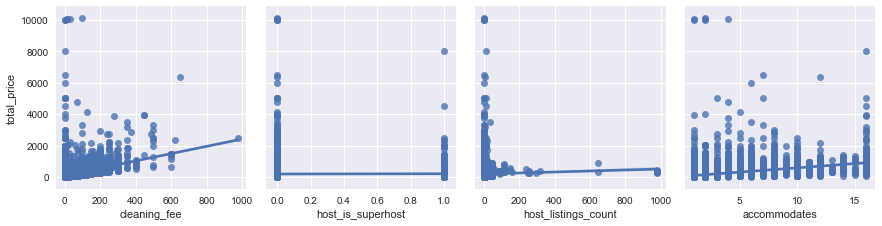

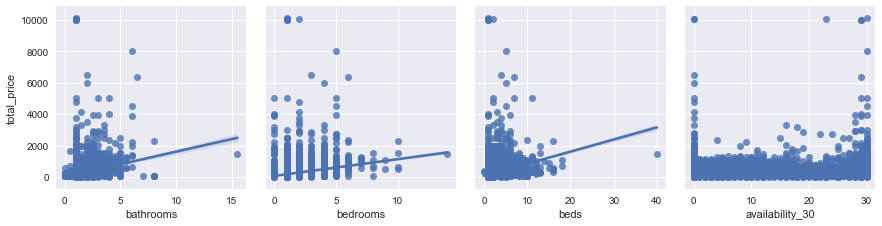

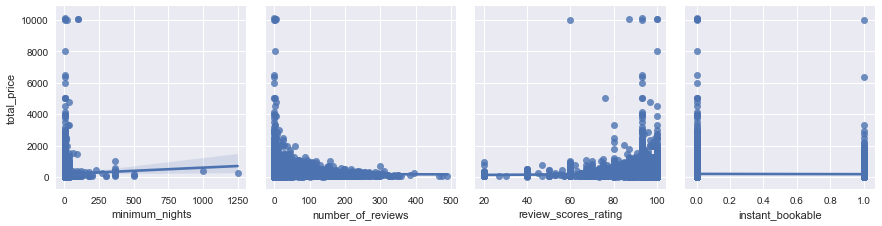

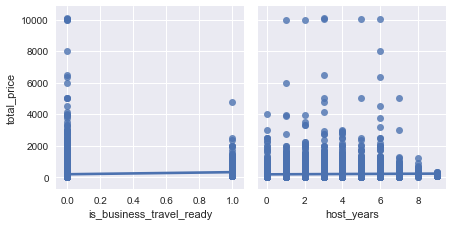

In [467]:
# Created subplots of my features in order to compare it with my target variable and look for any more linear relationships and outliers
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['total_price'],x_vars=i, kind="reg", height=3)

# Multi-Regression

In [253]:
# First multi-regression model was made from just the sub features listed above
from statsmodels.formula.api import ols
model = ols(formula='total_price~host_is_superhost+host_listings_count+zipcode+latitude+longitude+accommodates+bathrooms+bedrooms+beds+cleaning_fee+minimum_nights+availability_30+number_of_reviews+review_scores_rating+instant_bookable+is_business_travel_ready+host_years+crimes+population+Crimes_per_1000_persons', data=df_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_price   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     1388.
Date:                Mon, 22 Jun 2020   Prob (F-statistic):               0.00
Time:                        03:54:45   Log-Likelihood:            -2.7418e+05
No. Observations:               42064   AIC:                         5.484e+05
Df Residuals:                   42043   BIC:                         5.486e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.551e+04   2781.771     -5.577      0.000    -2.1e+04   -1.01e+04
host_is_superhost            0.7154      2.752      0.260      0.795      -4.679       6.110
host_listings_count         -0.0070      0.055     -0.127      0.899      -0.115       0.101
zipcode                     -0.0435      0.003    -16.431      0.000      -0.049      -0.038
latitude                  -122.9456     24.488     -5.021      0.000    -170.942     -74.949
longitude                 -282.1479     27.953    -10.094      0.000    -336.936    -227.360
accommodates                30.2989      0.782     38.745      0.000      28.766      31.832
bathrooms                   71.2682      2.203     32.354      0.000      66.951      75.586
bedrooms                    14.8301      1.603      9.252      0.000      11.688      17.972
beds                        -9.6803      1.352     -7.158      0.000     -12.331      -7.030
cleaning_fee                 1.4439      0.020     72.784      0.000       1.405       1.483
minimum_nights               0.1761      0.106      1.655      0.098      -0.032       0.385
availability_30              1.8348      0.091     20.128      0.000       1.656       2.014
number_of_reviews           -0.3790      0.026    -14.447      0.000      -0.430      -0.328
review_scores_rating         0.7466      0.113      6.605      0.000       0.525       0.968
instant_bookable            -9.0608      1.913     -4.737      0.000     -12.810      -5.312
is_business_travel_ready    13.4897      3.436      3.926      0.000       6.755      20.224
host_years                   2.4401      0.455      5.361      0.000       1.548       3.332
crimes                      -0.0040      0.001     -5.775      0.000      -0.005      -0.003
population               -1.007e-05    2.2e-05     -0.458      0.647   -5.32e-05     3.3e-05
Crimes_per_1000_persons      0.7626      0.095      8.023      0.000       0.576       0.949
==============================================================================
Omnibus:                    93322.298   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        835774991.634
Skew:                          20.520   Prob(JB):                         0.00
Kurtosis:                     692.329   Cond. No.                     7.64e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.64e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Dummy Variables

In [470]:
# I created 3 different sets of dummy variables in room type, cancellation policy and boroughs in order to be able to account for them in the modeling

In [254]:
pd.get_dummies(df_final['room_type'])

,Entire home/apt,Private room,Shared room
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
42059,1,0,0
42060,1,0,0
42061,1,0,0
42062,1,0,0


In [255]:
pd.get_dummies(df_final['cancellation_policy'])

,flexible,long_term,moderate,strict,super_strict_30,super_strict_60
0,0,0,0,1,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
42059,1,0,0,0,0,0
42060,0,0,1,0,0,0
42061,1,0,0,0,0,0
42062,1,0,0,0,0,0


In [256]:
pd.get_dummies(df_final['borough'])

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
42059,0,0,1,0,0
42060,0,0,1,0,0
42061,0,0,1,0,0
42062,0,0,1,0,0


In [257]:
df_dummy = pd.get_dummies(df_final, columns=['room_type','cancellation_policy','borough'])
df_dummy

,id,last_scraped,host_since,host_is_superhost,host_listings_count,zipcode,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,minimum_nights,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,total_price,host_years,neighborhood,crimes,population,Crimes_per_1000_persons,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_long_term,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island
0,18461891,17,11,0,1.0,11105,40.774142,-73.916246,Apartment,2,1.0,0.0,1.0,110,85,6,0,0,93.0,0,0,195,6,Northwest Queens,5347,204715,26,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,6292515,17,11,0,1.0,11105,40.771787,-73.898799,Apartment,1,1.0,1.0,1.0,50,0,7,0,1,80.0,0,0,50,6,Northwest Queens,5347,204715,26,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,19242246,17,15,0,1.0,11105,40.774224,-73.898330,Townhouse,3,1.0,1.0,2.0,120,50,1,25,5,95.0,0,0,170,2,Northwest Queens,5347,204715,26,1,0,0,1,0,0,0,0,0,0,0,0,1,0
3,13822852,17,14,0,1.0,11105,40.774072,-73.900373,House,5,1.0,2.0,2.0,200,60,3,25,0,93.0,0,0,260,3,Northwest Queens,5347,204715,26,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,8079482,17,15,0,1.0,11105,40.771654,-73.901771,Apartment,2,1.0,0.0,1.0,130,0,1,2,39,99.0,0,0,130,2,Northwest Queens,5347,204715,26,1,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,19400183,17,17,0,1.0,10025,40.803033,-73.964985,Apartment,2,1.0,1.0,1.0,634,0,1,30,0,93.0,0,0,634,0,Upper West Side,2931,220080,13,1,0,0,1,0,0,0,0,0,0,0,1,0,0
42060,7603693,17,13,0,1.0,10025,40.794835,-73.974655,Apartment,2,1.0,0.0,1.0,125,80,2,0,11,98.0,0,0,205,4,Upper West Side,2931,220080,13,1,0,0,0,0,1,0,0,0,0,0,1,0,0
42061,19007171,17,15,0,1.0,10025,40.792376,-73.967366,Apartment,2,1.0,1.0,1.0,130,0,1,0,3,80.0,0,0,130,2,Upper West Side,2931,220080,13,1,0,0,1,0,0,0,0,0,0,0,1,0,0
42062,3278436,17,13,0,1.0,10024,40.782064,-73.977966,Apartment,4,2.0,2.0,2.0,330,75,3,3,8,100.0,0,0,405,4,Upper West Side,2931,220080,13,1,0,0,1,0,0,0,0,0,0,0,1,0,0


In [258]:
# Renamed columns for formatting purposes
df_dummy.rename(columns={'room_type_Entire home/apt':'Entire_home_apt','room_type_Private room':'Private_room',
                        'room_type_Shared room':'Shared_room','cancellation_policy_flexible':'flexible',
                        'cancellation_policy_long_term':'long_term','cancellation_policy_moderate':'moderate',
                        'cancellation_policy_strict':'strict','cancellation_policy_super_strict_30':'strict_30',
                        'cancellation_policy_super_strict_60':'strict_60','borough_Bronx':'Bronx','borough_Brooklyn':'Brooklyn',
                        'borough_Manhattan':'Manhattan','borough_Queens':'Queens','borough_Staten Island':'Staten_Island'},inplace=True)

In [453]:
import csv
df_dummy.to_csv('dummy_data.csv')

In [260]:
# Re ran the multi-regression model with the dummy variables and was able to raise the R2 value by 0.2 to better account for variance in the dependent variable (total_price)
from statsmodels.formula.api import ols
dummy_model = ols(formula='total_price~host_is_superhost+host_listings_count+zipcode+latitude+longitude+accommodates+bathrooms+bedrooms+beds+cleaning_fee+minimum_nights+availability_30+number_of_reviews+review_scores_rating+instant_bookable+is_business_travel_ready+host_years+crimes+population+Crimes_per_1000_persons+Entire_home_apt+Private_room+Shared_room+flexible+long_term+moderate+strict+strict_30+strict_60+Bronx+Brooklyn+Manhattan+Queens+Staten_Island', data=df_dummy).fit()
dummy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_price   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     967.9
Date:                Mon, 22 Jun 2020   Prob (F-statistic):               0.00
Time:                        04:01:14   Log-Likelihood:            -2.7350e+05
No. Observations:               42064   AIC:                         5.471e+05
Df Residuals:                   42032   BIC:                         5.474e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -2.031e+04   2104.028     -9.651      0.000   -2.44e+04   -1.62e+04
host_is_superhost            9.1701      2.726      3.364      0.001       3.828      14.512
host_listings_count         -0.0013      0.054     -0.024      0.981      -0.108       0.105
zipcode                      0.0268      0.020      1.371      0.170      -0.012       0.065
latitude                  -150.2286     27.118     -5.540      0.000    -203.381     -97.076
longitude                 -545.7401     38.468    -14.187      0.000    -621.138    -470.342
accommodates                22.9242      0.822     27.897      0.000      21.314      24.535
bathrooms                   80.5291      2.195     36.693      0.000      76.227      84.831
bedrooms                    21.6699      1.605     13.499      0.000      18.524      24.816
beds                        -9.4431      1.337     -7.065      0.000     -12.063      -6.823
cleaning_fee                 1.3467      0.021     64.844      0.000       1.306       1.387
minimum_nights               0.1143      0.105      1.088      0.277      -0.092       0.320
availability_30              2.4929      0.093     26.895      0.000       2.311       2.675
number_of_reviews           -0.2684      0.026    -10.167      0.000      -0.320      -0.217
review_scores_rating         0.6420      0.111      5.762      0.000       0.424       0.860
instant_bookable            -4.9436      1.888     -2.618      0.009      -8.645      -1.242
is_business_travel_ready     1.1807      3.428      0.344      0.731      -5.539       7.901
host_years                   1.9198      0.452      4.251      0.000       1.035       2.805
crimes                      -0.0009      0.001     -1.175      0.240      -0.002       0.001
population                  -0.0001   2.37e-05     -5.155      0.000      -0.000   -7.57e-05
Crimes_per_1000_persons      0.2148      0.102      2.097      0.036       0.014       0.416
Entire_home_apt          -6725.0725    701.395     -9.588      0.000   -8099.820   -5350.324
Private_room             -6776.9435    701.290     -9.664      0.000   -8151.486   -5402.401
Shared_room              -6803.6640    701.357     -9.701      0.000   -8178.337   -5428.991
flexible                 -3508.7349    351.960     -9.969      0.000   -4198.584   -2818.886
long_term                -3582.2102    375.969     -9.528      0.000   -4319.117   -2845.304
moderate                 -3533.4144    351.965    -10.039      0.000   -4223.273   -2843.556
strict                   -3534.9706    351.952    -10.044      0.000   -4224.804   -2845.137
strict_30                -3447.0679    354.155     -9.733      0.000   -4141.219   -2752.916
strict_60                -2699.2820    360.645     -7.485      0.000   -3406.154   -1992.410
Bronx         

# Visualizations

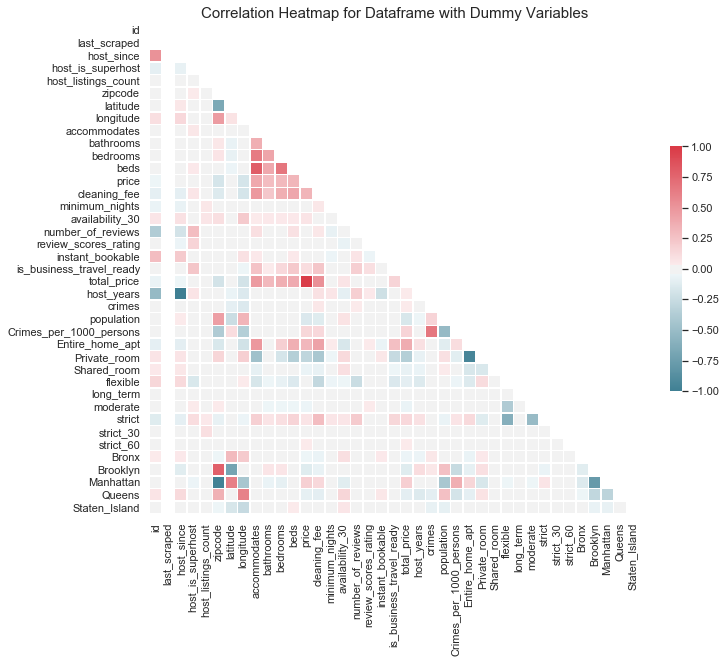

In [317]:
# Now with all these new features I created a heat map to see the correlation between all of the columns
sns.set(style="white")
corr = df_dummy.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap for Dataframe with Dummy Variables',fontsize=15);

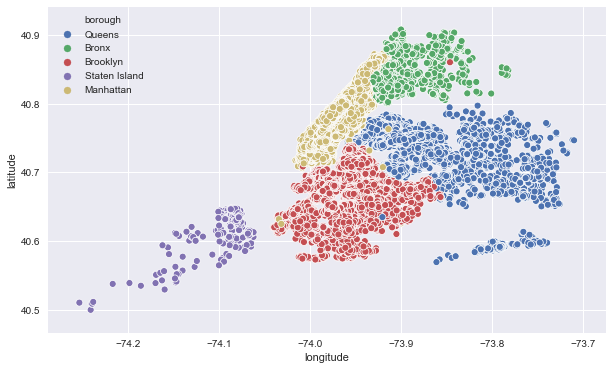

In [471]:
# Mapped out all listings in a geo visual plot to best show where all of the listings are on a macro level
plt.figure(figsize=(10,6))
sns.scatterplot(df_final['longitude'],df_final['latitude'],hue=df_final['borough']);

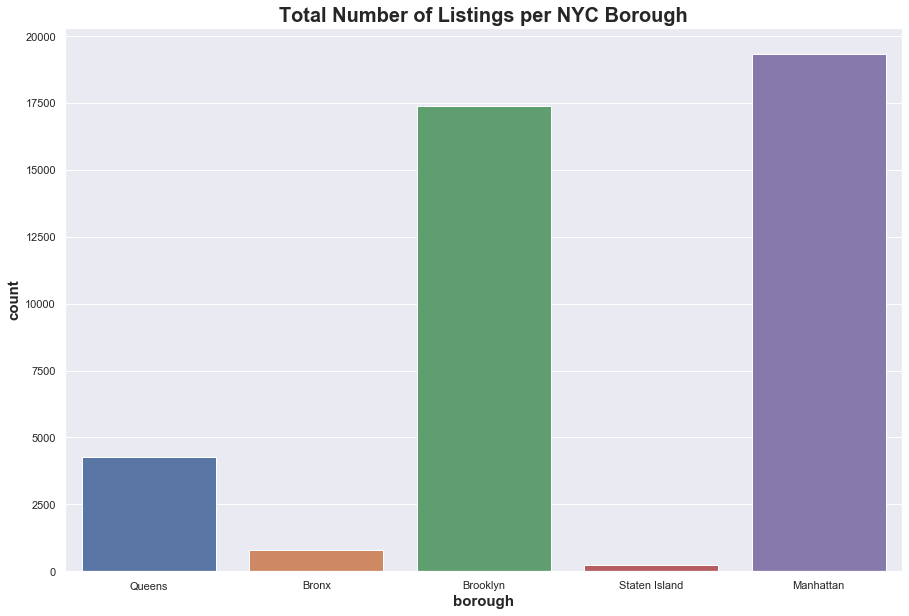

In [307]:
# Diving into the Boroughs deeper. Manhattan and Brooklyn make up almost all of the available listings on airbnb
# Bronx & Staten Island have a negligable impact which shows the importance in demand for location in NYC
fig,ax=plt.subplots(figsize=(15,10))
sns.set(style='darkgrid')
ax.set_xlabel('Borough',fontweight='bold', fontsize=(15))
ax.set_ylabel('# of listings',fontweight='bold', fontsize=(15))
ax.set_title('Total Number of Listings per NYC Borough', fontweight='bold', fontsize=(20))

ax =sns.countplot(df_final['borough'],data=df_final)

In [265]:
series3 = df_final.groupby('neighborhood')['total_price'].mean()

In [268]:
neighborhood_crime = pd.concat([crime_rate, series3], axis=1, sort=False)
neighborhood_crime.columns = ['crimes','population','Crimes_per_1000_persons','avg_price']
neighborhood_crime.drop(columns=['crimes','population'],inplace = True)
neighborhood_crime

,Crimes_per_1000_persons,avg_price
neighborhood,,
Borough Park,12.859092,149.306931
Bronx Park and Fordham,20.292494,90.420561
Bushwick and Williamsburg,22.017599,120.419579
Canarsie and Flatlands,7.819430,155.664474
Central Bronx,40.142444,109.913978
Central Brooklyn,32.747148,160.632874
Central Harlem,41.136906,166.377657
Central Queens,20.737161,129.471429
Chelsea and Clinton,76.124138,283.732541


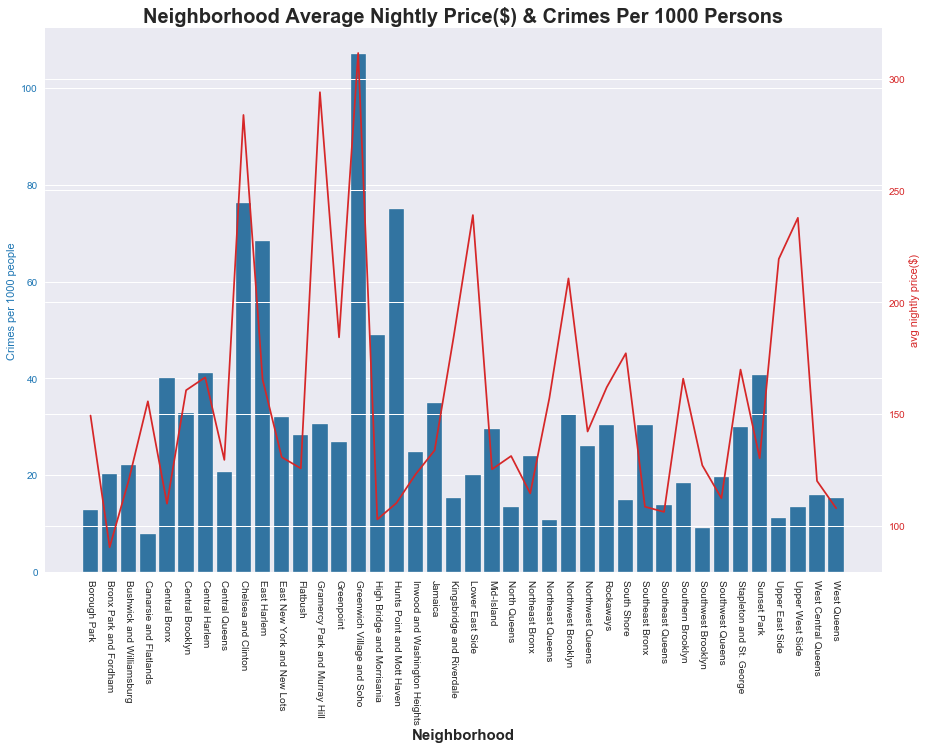

In [349]:
# There isn't much correlation between crime rate and total price. The correlation is only.15
# It is worth noting that the lowest crime rates in Brooklyn, Queens & Manhattan boast some of the highest average prices 
x = neighborhood_crime['Crimes_per_1000_persons'].keys()
y1 = neighborhood_crime['Crimes_per_1000_persons'].values
y2 = neighborhood_crime['avg_price'].values

fig,ax1=plt.subplots(figsize=(15,10))
color = 'tab:blue'
sns.barplot(x, y1, color=color)
ax1.set_xlabel('Neighborhood',fontweight='bold', fontsize=(15))
ax1.set_ylabel('Crimes per 1000 people', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=-90)
ax1.set_title('Neighborhood Average Nightly Price($) & Crimes Per 1000 Persons', fontweight='bold', fontsize=(20))
ax2 = ax1.twinx()

color = 'tab:red'
ax2.plot(x, y2, color=color)
ax2.set_ylabel('avg nightly price($)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()


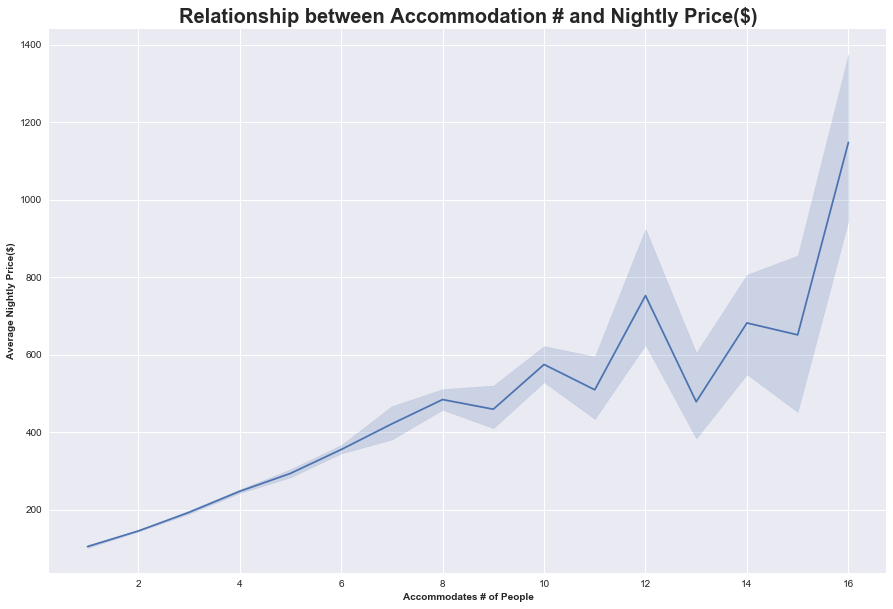

In [347]:
# I wanted to show the relationship between total accommodation # with price. Accommodation # boasts one of the highest correlation of .48
# General logic applies that larger spaces will be able to charge more
fig,ax=plt.subplots(figsize=(15,10))
sns.lineplot(x="accommodates", y="total_price", data=df_final)
ax.set_xlabel('Accommodates # of People', fontweight='bold', fontsize=(10))
ax.set_ylabel('Average Nightly Price($)', fontweight='bold', fontsize=(10))
ax.set_title('Relationship between Accommodation # and Nightly Price($)', fontweight='bold', fontsize=(20));


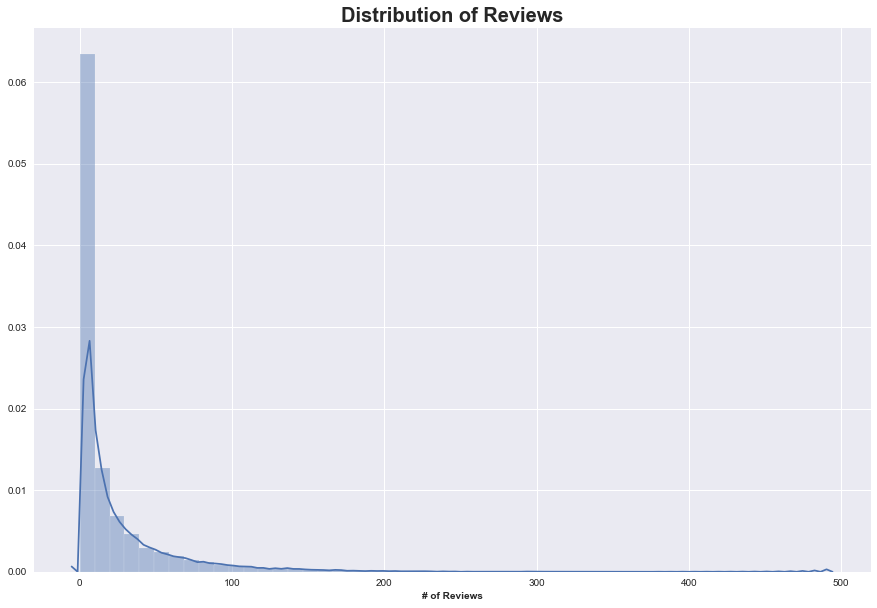

In [350]:
# Heavy positive skey where most listings have review of 30 and under
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(df_final.number_of_reviews)
ax.set_xlabel('# of Reviews', fontweight='bold', fontsize=(10))
ax.set_title('Distribution of Reviews', fontweight='bold', fontsize=(20));

# Hypothesis Testing

## #1 Two Sample T Test

Hypothesis Testing:

Null: No statistical difference between superhost status and total price u1 = u2

Alternative: There is a statisitcal difference between superhost status and total price u1 =/ u2

In [368]:
# subset for each category of superhost status I'm testing
notsuperhost = df_final[df_final['host_is_superhost']==0]
yessuperhost = df_final[df_final['host_is_superhost']==1]

In [369]:
stats.ttest_ind(notsuperhost['total_price'],yessuperhost['total_price'], equal_var = False)

Ttest_indResult(statistic=-4.809893082774779, pvalue=1.5481522700275988e-06)

We FAIL to reject the null hypothesis because our pvalue (1.54) is greater than 0.05 (alpha set at .05)

## #2 One way ANOVA

Hypothesis Testing:

Null: No statistical difference of mean total price between Boroughs

Alternative: There is a statisitcal difference of mean total price between Boroughs

In [356]:
stats.f_oneway(df_final['total_price'][df_final['borough'] == 'Manhattan'],
               df_final['total_price'][df_final['borough'] == 'Brooklyn'],
               df_final['total_price'][df_final['borough'] == 'Queens'],
               df_final['total_price'][df_final['borough'] == 'Bronx'],
               df_final['total_price'][df_final['borough'] == 'Staten Island'])

F_onewayResult(statistic=434.68890771266587, pvalue=0.0)

We CAN reject the null hypothesis because our pvalue is less than 0.05 (alpha set at .05)

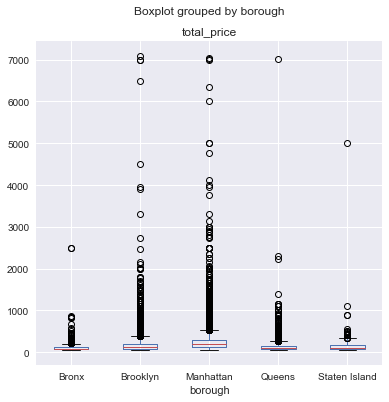

In [353]:
df_final.boxplot('total_price', by='borough', figsize=(6,6));

## #3 Chi Square Test

Hypothesis Testing:

Null: There is no relationship between the borough and the room type of a listing

Alternative: There is a relationship between the borough and the room type of a listing

In [365]:
df_chi = df_final.groupby('room_type')['borough'].value_counts()
df_chi2 = df_chi.unstack()
df_chi2.fillna(0,inplace = True)
df_chi2.head()

borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,221.0,7762.0,11223.0,1556.0,123.0
Private room,525.0,9284.0,7588.0,2560.0,131.0
Shared room,39.0,347.0,535.0,170.0,0.0


In [366]:
# contingency table
stat, p, dof, expected = chi2_contingency(df_chi2)
print(expected)

#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

[[3.89756680e+02 8.63571712e+03 9.60539202e+03 2.12802182e+03
  1.26112353e+02]
 [3.74883035e+02 8.30616641e+03 9.23883720e+03 2.04681362e+03
  1.21299734e+02]
 [2.03602843e+01 4.51116465e+02 5.01770778e+02 1.11164559e+02
  6.58791366e+00]]
probability=0.950, critical=15.507, stat=1268.393)
Dependent (reject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


We CAN reject the null hypothesis because chi square statistic (1268) is greater than the critical value (15.507)

# Modeling & Feature Selection

## Model #1 Dummy Variables

In [387]:
features=['host_is_superhost','host_listings_count','zipcode','latitude','longitude','accommodates',
          'bathrooms','bedrooms','beds','cleaning_fee','minimum_nights','availability_30','number_of_reviews',
          'review_scores_rating','instant_bookable','is_business_travel_ready','host_years','crimes',
          'population','Crimes_per_1000_persons','Entire_home_apt','Private_room','Shared_room','flexible',
          'long_term','moderate','strict','strict_30','strict_60','Bronx','Brooklyn','Manhattan','Queens','Staten_Island']

df_features = df_dummy[features]

target = df_dummy['total_price']

In [384]:
X_train,X_test, y_train, y_test = train_test_split(df_features, target, random_state=24,test_size=0.2)
lm = linear_model.LinearRegression()
lm = lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_pred = lm.predict(X_test)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  155 vs. Testing:  183


## Model #2 No Dummy Variables

In [388]:
nodumfeatures=['host_is_superhost','host_listings_count','zipcode','latitude','longitude','accommodates',
          'bathrooms','bedrooms','beds','cleaning_fee','minimum_nights','availability_30','number_of_reviews',
          'review_scores_rating','instant_bookable','is_business_travel_ready','host_years','crimes',
          'population','Crimes_per_1000_persons']

df_nodumfeatures = df_final[nodumfeatures]

nodumtarget = df_final['total_price']

In [389]:
X_train1,X_test1, y_train1, y_test1 = train_test_split(df_nodumfeatures, nodumtarget, random_state=24,test_size=0.2)
lm = linear_model.LinearRegression()
lm = lm.fit(X_train1, y_train1)
y_train1_pred = lm.predict(X_train1)
y_pred1 = lm.predict(X_test1)
train1_rmse = np.sqrt(metrics.mean_squared_error(y_train1, y_train1_pred))
test1_rmse = np.sqrt(metrics.mean_squared_error(y_test1, y_pred1))
print('Training: ', int(train1_rmse), "vs. Testing: ", int(test1_rmse))

Training:  157 vs. Testing:  185


## Model #3 Dummy Variables with Polynomials

In [398]:
features=['host_is_superhost','host_listings_count','zipcode','latitude','longitude','accommodates',
          'bathrooms','bedrooms','beds','cleaning_fee','minimum_nights','availability_30','number_of_reviews',
          'review_scores_rating','instant_bookable','is_business_travel_ready','host_years','crimes',
          'population','Crimes_per_1000_persons','Entire_home_apt','Private_room','Shared_room','flexible',
          'long_term','moderate','strict','strict_30','strict_60','Bronx','Brooklyn','Manhattan','Queens','Staten_Island']

df_features = df_dummy[features]

target = df_dummy['total_price']

In [399]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,host_is_superhost,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,host_years,crimes,population,Crimes_per_1000_persons,Entire_home_apt,Private_room,Shared_room,flexible,long_term,moderate,strict,strict_30,strict_60,Bronx,Brooklyn,Manhattan,Queens,Staten_Island,host_is_superhost^2,host_is_superhost host_listings_count,host_is_superhost zipcode,host_is_superhost latitude,host_is_superhost longitude,host_is_superhost accommodates,host_is_superhost bathrooms,host_is_superhost bedrooms,host_is_superhost beds,host_is_superhost cleaning_fee,host_is_superhost minimum_nights,host_is_superhost availability_30,host_is_superhost number_of_reviews,host_is_superhost review_scores_rating,host_is_superhost instant_bookable,host_is_superhost is_business_travel_ready,...,long_term Bronx,long_term Brooklyn,long_term Manhattan,long_term Queens,long_term Staten_Island,moderate^2,moderate strict,moderate strict_30,moderate strict_60,moderate Bronx,moderate Brooklyn,moderate Manhattan,moderate Queens,moderate Staten_Island,strict^2,strict strict_30,strict strict_60,strict Bronx,strict Brooklyn,strict Manhattan,strict Queens,strict Staten_Island,strict_30^2,strict_30 strict_60,strict_30 Bronx,strict_30 Brooklyn,strict_30 Manhattan,strict_30 Queens,strict_30 Staten_Island,strict_60^2,strict_60 Bronx,strict_60 Brooklyn,strict_60 Manhattan,strict_60 Queens,strict_60 Staten_Island,Bronx^2,Bronx Brooklyn,Bronx Manhattan,Bronx Queens,Bronx Staten_Island,Brooklyn^2,Brooklyn Manhattan,Brooklyn Queens,Brooklyn Staten_Island,Manhattan^2,Manhattan Queens,Manhattan Staten_Island,Queens^2,Queens Staten_Island,Staten_Island^2
0,0.0,1.0,11105.0,40.774142,-73.916246,2.0,1.0,0.0,1.0,85.0,6.0,0.0,0.0,93.0,0.0,0.0,6.0,5347.0,204715.0,26.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,11105.0,40.771787,-73.898799,1.0,1.0,1.0,1.0,0.0,7.0,0.0,1.0,80.0,0.0,0.0,6.0,5347.0,204715.0,26.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,11105.0,40.774224,-73.898330,3.0,1.0,1.0,2.0,50.0,1.0,25.0,5.0,95.0,0.0,0.0,2.0,5347.0,204715.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,11105.0,40.774072,-73.900373,5.0,1.0,2.0,2.0,60.0,3.0,25.0,0.0,93.0,0.0,0.0,3.0,5347.0,204715.0,26.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,11105.0,40.771654,-73.901771,2.0,1.0,0.0,1.0,0.0,1.0,2.0,39.0,99.0,0.0,0.0,2.0,5347.0,204715.0,26.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [400]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_poly2, target, random_state=24,test_size=0.2)
scaler2 = StandardScaler()
scaled = scaler2.fit(X_train2)

X_train2 = pd.DataFrame(data=scaler2.transform(X_train2), columns=df_poly2.columns)

X_test2 = pd.DataFrame(data=scaler2.transform(X_test2), columns=df_poly2.columns)

lm_2 = LinearRegression()

lm_2 = lm_2.fit(X_train2, y_train2)

y_train_pred2 = lm_2.predict(X_train2)

train2_rmse = np.sqrt(metrics.mean_squared_error(y_train2, y_train_pred2))

y_pred2 = lm_2.predict(X_test2)

test2_rmse = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))

print('Training: ', int(train2_rmse), "vs. Testing: ", int(test2_rmse))

Training:  138 vs. Testing:  21913478004461


## Model #4 Dummy Variables with F Test & No Polynomial

In [432]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

X_train3, X_test3, y_train3, y_test3 = train_test_split(df_features, target, random_state=24,test_size=0.2)

selector = SelectKBest(f_regression, k=13)

selector.fit(X_train3, y_train3)

SelectKBest(k=13, score_func=<function f_regression at 0x1a75721a70>)

In [433]:
selected_columns = X_train3.columns[selector.get_support()]
removed_columns = X_train3.columns[~selector.get_support()]
# X_train = X_train3[selected_columns]
# X_test = X_test3[selected_columns]

In [434]:
list(removed_columns)

['host_is_superhost',
 'host_listings_count',
 'latitude',
 'minimum_nights',
 'availability_30',
 'number_of_reviews',
 'review_scores_rating',
 'instant_bookable',
 'host_years',
 'crimes',
 'Shared_room',
 'flexible',
 'long_term',
 'moderate',
 'strict',
 'strict_30',
 'strict_60',
 'Bronx',
 'Brooklyn',
 'Queens',
 'Staten_Island']

In [435]:
list(selected_columns)

['zipcode',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'is_business_travel_ready',
 'population',
 'Crimes_per_1000_persons',
 'Entire_home_apt',
 'Private_room',
 'Manhattan']

In [436]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train3[selected_columns], y_train3)

y_train_kbest = lm_kbest.predict(X_train3[selected_columns])

train3_rmse = np.sqrt(metrics.mean_squared_error(y_train3, y_train_kbest))

y_kbest = lm_kbest.predict(X_test3[selected_columns])

test3_rmse = np.sqrt(metrics.mean_squared_error(y_test3, y_kbest))

print('Training: ', int(train3_rmse), "vs. Testing: ", int(test3_rmse))

Training:  158 vs. Testing:  185


## Model #5 Dummy Variables with Recursive Test

In [455]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(df_features, target, random_state=24,test_size=0.2)

from sklearn.feature_selection import RFECV

lm4 = linear_model.LinearRegression()

# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=lm4, step=1, cv=10, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train4, y_train4)

selected_rfe = X_train4.columns[selector.support_]
removed_rfe = X_train4.columns[~selector.support_]

#instantiate a linear regression object
lm4_rfe = LinearRegression()

#fit the linear regression to the data
lm4_rfe = lm4_rfe.fit(X_train4[selected_rfe], y_train4)

y_rfe = lm4_rfe.predict(X_train4[selected_rfe])

train4_rmse = np.sqrt(metrics.mean_squared_error(y_train4, y_rfe))

y_pred_rfe = lm4_rfe.predict(X_test4[selected_rfe])

test4_rmse = np.sqrt(metrics.mean_squared_error(y_test4, y_pred_rfe))

print('Training: ', int(train4_rmse), "vs. Testing: ", int(test4_rmse))

Training:  155 vs. Testing:  183


In [456]:
# Pickled the data to save the model to use for my own apartment data
import pickle

pickle_out = open("prediction.pickle","wb")
pickle.dump(lm4_rfe, pickle_out)
pickle_out.close()

# Model Results

In [452]:
# Recursive Testting performed the best and will be used for my test
print('#1 Original Training Error: ', int(train_rmse), '#1 Original Testing Error: ', int(test_rmse))
print('#2 No Dummy Training Error: ', int(train1_rmse), '#2 No Dummy Testing Error: ', int(test1_rmse))
print('#3 Poly Training Error: ', int(train2_rmse), '#3 Poly Testing Error: ', int(test2_rmse))
print('#4 F-Test Training Error: ', int(train3_rmse), '#4 F-Test Testing Error: ', int(test3_rmse))
print('#5 Recursive Training Error: ', int(train4_rmse), '#5 Recursive Testing Error: ', int(test4_rmse))

#1 Original Training Error:  155 #1 Original Testing Error:  183
#2 No Dummy Training Error:  157 #2 No Dummy Testing Error:  185
#3 Poly Training Error:  138 #3 Poly Testing Error:  21913478004461
#4 F-Test Training Error:  158 #4 F-Test Testing Error:  185
#5 Recursive Training Error:  155 #5 Recursive Testing Error:  183
